# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Carmen Emanuela Dwiva Lisapaly]
- **Email:** [carmen.lisapaly@gmail.com]
- **ID Dicoding:** [carmen_ed_lisapaly]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim?
- Kapan waktu puncak penggunaan sepeda dalam sehari?
- Bagaimana perbedaan penggunaan sepeda antara hari kerja dan hari libur?
- Kapan terakhir kali pengguna kasual menggunakan sepeda?
- Seberapa sering pengguna terdaftar menyewa sepeda?
- seberapa besar kontribusi pengguna terhadap total peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Menghubungkan Google Colab ke Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
day_df = pd.read_csv('/content/drive/My Drive/dicoding/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**  
- Dataset `day_df` terdiri dari 16 atribut.  
- Data yang ditampilkan dari kode adalah 5 baris teratas.  
- Atribut `cnt` adalah total penyewaan sepeda (gabungan pengguna kasual dan terdaftar).    


In [5]:
hour_df = pd.read_csv('/content/drive/My Drive/dicoding/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**  
- Dataset `hour_df` terdiri dari 17 atribut.  
- Data yang ditampilkan dari kode 5 baris teratas.  
- Atribut `cnt` adalah total penyewaan sepeda (gabungan pengguna kasual dan terdaftar).    


### Assessing Data

**Menilai data day_df**

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- `Tidak ada missing value` pada data day_df.
- Terdapat kesalahan tipe data untuk kolom `dteday`. Kolom tersebut harusnya di representasikan sebagai tipe data `datetime`, bukan object.

In [7]:
print("Jumlah duplikasi :", day_df.duplicated().sum())

Jumlah duplikasi : 0


**Insight:**
- `Tidak ada duplikasi` pada data day_df.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Memeriksa apakah total peminjaman sepeda dari penjumlahan casual dan registered sudah benar atau belum

(day_df['casual'] + day_df['registered'] == day_df['cnt']).all()

True

**Insight:**
- `Tidak terdapat keanehan` dari data day_df tersebut.
- Total peminjaman sepeda dari penjumlahan casual dan registered adalah `benar`, tidak terdapat kesalahan penjumlahan.

**Menilai data hour_df**

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- `Tidak ada missing value` pada data hour_df.
- Terdapat kesalahan tipe data untuk kolom `dteday`. Kolom tersebut harusnya di representasikan sebagai tipe data `datetime`, bukan object.

In [13]:
print("Jumlah duplikasi :", hour_df.duplicated().sum())

Jumlah duplikasi : 0


**Insight:**
- `Tidak ada duplikasi` pada data hour_df.

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
# Memeriksa apakah total peminjaman sepeda dari penjumlahan casual dan registered sudah benar atau belum

(day_df['casual'] + day_df['registered'] == day_df['cnt']).all()

True

**Insight:**
- `Tidak terdapat keanehan` dari data day_df tersebut.
- Total peminjaman sepeda dari penjumlahan casual dan registered adalah `benar`, tidak terdapat kesalahan penjumlahan.

### Cleaning Data

**Membersihkan data day_df**

In [18]:
# Mengubah tipe data pada dteday menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tipe data pada kolom dteday, `sudah berubah menjadi datetime`.

**Membersihkan data hour_df**

In [20]:
# Mengubah tipe data pada dteday menjadi datetime

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipe data pada kolom dteday, `sudah berubah menjadi datetime`.

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi data day_df**

In [22]:
# Mengelompokkan berdasarkan musim dan menghitung rata-rata jumlah peminjaman (cnt)

season_usage = day_df.groupby('season')['cnt'].mean()
season_usage

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


**Insight:**

- `Musim Semi (Season 3)` merupakan musim dengan tingkat peminjaman sepeda `tertinggi`, dengan rata-rata peminjaman sekitar `5644 sepeda`.
- `Musim Panas (Season 2)` juga memiliki tingkat peminjaman yang `cukup tinggi`, dengan rata-rata peminjaman `4992 sepeda`.
- `Musim Gugur (Season 4)` memiliki tingkat peminjaman yang `lebih rendah`,  dengan rata-rata peminjaman `4728 sepeda`.
- `Musim Dingin (Season 1)` memiliki tingkat peminjaman `terendah` dengan rata-rata peminjaman `2604 sepeda`.

In [26]:
# Membandingkan total jumlah peminjaman antara hari kerja dan hari libur

workday_usage = day_df.groupby('workingday')['cnt'].mean()
workday_usage

,cnt
workingday,
0,4330.168831
1,4584.820000


**Insight:**

- Peminjaman sepeda `lebih tinggi pada hari kerja` dengan `rata-rata 4584.82` dibandingkan dengan `hari libur` yang `memiliki rata-rata 4330.17`.
- Wawasan ini menunjukkan bahwa sepeda lebih banyak digunakan pada hari kerja, kemungkinan karena orang menggunakan sepeda untuk aktivitas seperti pergi bekerja.

In [28]:
# Mengelompokkan berdasarkan cuaca dan menghitung rata-rata peminjaman sepeda

weather_usage = day_df.groupby('weathersit')['cnt'].mean()
weather_usage

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


**Insight:**

- `Peminjaman sepeda tertinggi` terjadi `pada kondisi cuaca baik (Weathersit 1)` dengan `rata-rata 4876.79` peminjaman.
- `Peminjaman sepeda sedikit menurun` pada cuaca `sedikit berawan atau berawan (Weathersit 2)` dengan `rata-rata 4035.86` peminjaman.
- `Peminjaman sepeda paling rendah` tercatat `pada kondisi cuaca hujan atau salju (Weathersit 3)` dengan `rata-rata 1803.29` peminjaman.
- Wawasan ini menunjukan bahwa cuaca yang buruk, seperti hujan atau salju, berpengaruh signifikan pada penurunan jumlah peminjaman sepeda.

In [29]:
# Mengelompokkan berdasarkan hari dalam seminggu dan menghitung rata-rata peminjaman sepeda


weekday_usage = day_df.groupby('weekday')['cnt'].mean()
weekday_usage

,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


**Insight:**

- `Peminjaman sepeda cenderung meningkat sepanjang minggu`, dengan jumlah peminjaman `tertinggi` pada `hari Sabtu (weekday 6)` dan `hari Jumat (weekday 5)`, serta `sedikit menurun` pada `hari Minggu (weekday 0)`.
- Peningkatan peminjaman di akhir pekan menunjukkan bahwa lebih banyak orang menggunakan sepeda untuk kegiatan rekreasi atau perjalanan non-kerja.

**Eksplorasi data hour_df**

In [30]:
# Menyaring pengguna kasual dan mendapatkan tanggal penggunaan terakhir

casual_users = hour_df[hour_df['casual'] > 0]
latest_casual_usage = casual_users['dteday'].max()

print("Tanggal terakhir pengguna kasual menyewa sepeda:", latest_casual_usage)

Tanggal terakhir pengguna kasual menyewa sepeda: 2012-12-31 00:00:00


**Insight:**

- `Tanggal terakhir` pengguna kasual menyewa sepeda adalah `31 Desember 2012`.
- Wawasan ini menunjukkan bahwa pengguna kasual terakhir aktif pada akhir tahun 2012.

In [25]:
# Mengelompokkan berdasarkan jam dan menghitung total jumlah peminjaman (cnt)

hour_usage = hour_df.groupby('hr')['cnt'].sum()
hour_usage

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


**Insight:**

- Berdasarkan output yang didapatkan, `jam 8 pagi (08:00)` menunjukkan peminjaman sepeda yang `sangat tinggi`dengan `jumlah peminjaman` sebesar `261,001`.
- `Jam 5 sore (17:00)` juga menunjukkan peminjaman sepeda yang tinggi dengan `jumlah peminjaman` `336,860`, yang mencerminkan puncak penggunaan sepeda, kemungkinan besar untuk perjalanan pulang setelah jam kerja.
- Wawasan ini menunjukkan bahwa adanya dua waktu puncak utama waktu peminjaman, yaitu:
  1. `Pagi hari (08:00)`: Penggunaan sepeda untuk perjalanan pagi, seperti menuju tempat kerja atau aktivitas lainnya.
  2. `Sore hari (17:00 - 18:00)`: Penggunaan sepeda tertinggi untuk perjalanan pulang kerja.

In [31]:
# Mengelompokkan berdasarkan pengguna terdaftar dan menghitung frekuensi peminjaman mereka

registered_usage = hour_df.groupby('registered')['cnt'].mean()
registered_usage

,cnt
registered,
0,1.458333
1,1.462687
2,2.644898
3,3.925170
4,5.218241
...,...
860,967.000000
871,938.000000
876,958.000000


**Insight:**

- Output menunjukkan bahwa `jumlah rata-rata peminjaman sepeda meningkat` seiring dengan tingginya nilai pada kolom `registered`. Hal ini menunjukan bahwa pengguna yang sering menggunakan layanan lebih cenderung untuk menjadi pengguna terdaftar.
- `Pengguna dengan ID registered yang lebih besar` cenderung memiliki jumlah peminjaman sepeda yang `lebih tinggi` (contoh: `pengguna dengan ID 860 hingga 886 memiliki rata-rata peminjaman sekitar 958–977 kali`).
- Rata-rata peminjaman untuk pengguna dengan ID terdaftar yang rendah (misalnya, 0, 1, 2) jauh lebih kecil, menunjukkan bahwa mereka mungkin adalah pengguna baru atau jarang menggunakan layanan.

In [32]:
# Menghitung total peminjaman oleh pengguna kasual dan terdaftar
total_rentals = hour_df['cnt'].sum()
casual_contribution = hour_df['casual'].sum() / total_rentals
registered_contribution = hour_df['registered'].sum() / total_rentals

# Menampilkan hasil kontribusi
print(f"Kontribusi pengguna kasual: {casual_contribution*100:.2f}%")
print(f"Kontribusi pengguna terdaftar: {registered_contribution*100:.2f}%")

Kontribusi pengguna kasual: 18.83%
Kontribusi pengguna terdaftar: 81.17%


**Insight:**

- Pengguna terdaftar berkontribusi sebesar `81.17%` terhadap total peminjaman sepeda, menunjukkan bahwa mayoritas penggunaan berasal dari pelanggan yang telah mendaftar.
- Pengguna kasual hanya menyumbang `18.83%`, yang mengindikasikan mereka lebih jarang menggunakan layanan atau hanya menyewa sepeda sesekali.

In [36]:
# Mengelompokkan berdasarkan cuaca dan menghitung total peminjaman sepeda per cuaca

weather_hour_usage = hour_df.groupby('weathersit')['cnt'].sum()
weather_hour_usage

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


**Insight:**

1. `Cuaca Cerah (Weathersit = 1):`
   - Sebagian besar peminjaman sepeda terjadi saat cuaca cerah, dengan total sebanyak `2,338,173` peminjaman. Ini menunjukkan bahwa pengguna lebih nyaman menggunakan sepeda ketika cuaca mendukung.

2. `Cuaca Sedang (Weathersit = 2):`
   - Pada cuaca sedang (mendung atau dengan sedikit hujan/salju), peminjaman sepeda turun secara signifikan menjadi `795,952`.

3. `Cuaca Buruk (Weathersit = 3):`
   - Pada cuaca buruk (hujan deras/salju lebat), penggunaan sepeda berkurang drastis menjadi **158,331** peminjaman.

4. `Cuaca Sangat Ekstrem (Weathersit = 4):`
   - Hampir tidak ada aktivitas peminjaman (hanya `223`) pada kondisi cuaca ekstrem seperti badai.


**Eksplorasi data all_df**

In [37]:
# Agregasi data dari day_df
day_aggregated = day_df.groupby(['season', 'workingday', 'weathersit']).agg({
    'cnt': 'mean'
}).reset_index()

# Agregasi data dari hour_df
hour_aggregated = hour_df.groupby(['hr', 'weathersit']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Menggabungkan informasi dari day_df dan hour_df
all_df = pd.merge(
    left=day_aggregated,
    right=hour_aggregated,
    how='outer',
    on='weathersit',
    suffixes=('_day', '_hour')
)

# Menambahkan kontribusi pengguna kasual dan terdaftar ke all_df
all_df['casual_contribution'] = all_df['casual'] / all_df['cnt_hour']
all_df['registered_contribution'] = all_df['registered'] / all_df['cnt_hour']

# Menampilkan all_df
print(all_df.head())

   season  workingday  weathersit      cnt_day  hr  cnt_hour  casual  \
0     1.0         0.0           1  2288.609756   0     28930    5589   
1     1.0         0.0           1  2288.609756   1     16854    3406   
2     1.0         0.0           1  2288.609756   2     10907    2394   
3     1.0         0.0           1  2288.609756   3      5458    1305   
4     1.0         0.0           1  2288.609756   4      2931     582   

   registered  casual_contribution  registered_contribution  
0       23341             0.193190                 0.806810  
1       13448             0.202089                 0.797911  
2        8513             0.219492                 0.780508  
3        4153             0.239099                 0.760901  
4        2349             0.198567                 0.801433  


**Struktur data all_df:**
- `season`: Musim (dari day_df).
- `workingday`: Apakah hari kerja atau tidak (dari day_df).
- `weathersit`: Kondisi cuaca (penggabungan dari day_df dan hour_df).
- `cnt_day`: Rata-rata jumlah peminjaman berdasarkan day_df.
- `hr`: Jam (dari hour_df).
- `cnt_hour`: Total jumlah peminjaman berdasarkan hour_df.
- `casual`: Total peminjaman oleh pengguna kasual (dari hour_df).
- `registered`: Total peminjaman oleh pengguna terdaftar (dari hour_df).
- `casual_contribution`: Kontribusi pengguna kasual dalam persen.
- `registered_contribution`: Kontribusi pengguna terdaftar dalam persen

In [40]:
# Mengelompokkan data berdasarkan apakah hari kerja (workingday) atau tidak, untuk memahami pola penggunaan sepeda di hari yang berbeda.

all_df.groupby(by=["workingday"]).agg({
    "cnt_day": "mean",
    "cnt_hour": "sum"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day,cnt_hour
workingday,,
1.0,3574.464240,13169824
0.0,3557.153616,13169824


**Insight:**  

- Pada `hari kerja (workingday = 1)`, rata-rata peminjaman harian (`cnt_day`) sedikit lebih tinggi (`3574`) dibandingkan akhir pekan (`3557`).  
- Total peminjaman per jam (`cnt_hour`) memiliki `nilai yang sama pada hari kerja dan akhir pekan`, yang menunjukkan pola penggunaan yang merata sepanjang waktu.  

In [41]:
# Melihat pola peminjaman sepeda berdasarkan jam (hr).

all_df.groupby(by=["hr"]).agg({
    "cnt_hour": "sum",
    "casual": "sum",
    "registered": "sum"
}).sort_values(by="cnt_hour", ascending=False)

,cnt_hour,casual,registered
hr,,,
17,2694880,433760,2261120
18,2477028,355926,2121102
8,2088008,126088,1961920
16,1821732,430665,1391067
19,1814312,284040,1530272
13,1479352,421704,1057648
12,1475312,397744,1077568
15,1465192,436848,1028344
14,1405216,440712,964504


**Insight:**  

- `Jam 5 sore (17:00)` mencatat total peminjaman tertinggi (`cnt_hour`) dengan `2,694,880` peminjaman, yang `didorong` oleh pengguna terdaftar (`registered`) (2,261,120). Ini mencerminkan waktu puncak perjalanan pulang kerja.
- `Siang hari (12:00 - 14:00)` menunjukkan lonjakan peminjaman, terutama oleh `pengguna kasual (casual)`, dengan `397,744` peminjaman pada jam 12 dan `421,704` peminjaman pada jam 13. Hal ini mungkin terkait dengan aktivitas santai atau makan siang.
- `Jam 8 pagi (08:00)` dan `jam 16:00` juga mencatatkan peminjaman yang tinggi, dengan `208,8008` dan `1,821,732` peminjaman, masing-masing, menunjukkan waktu penggunaan sepeda pada pagi dan sore hari.

In [45]:
# Mengelompokkan data berdasarkan jenis pengguna (casual atau registered) untuk melihat kontribusi mereka terhadap total peminjaman.

all_df.groupby(by=["season"]).agg({
    "casual_contribution": "mean",
    "registered_contribution": "mean"
}).sort_values(by="registered_contribution", ascending=False)

,casual_contribution,registered_contribution
season,,
1.0,0.172749,0.827251
2.0,0.172749,0.827251
3.0,0.172749,0.827251
4.0,0.172749,0.827251


**Insight:**  

- `Kontribusi pengguna terdaftar (registered)` lebih `dominan` pada semua musim, dengan kontribusi yang konsisten sekitar `82.73%` dari total peminjaman.
- `Pengguna kasual (casual)` memberikan kontribusi yang lebih kecil, sekitar `17.27%`, di semua musim, yang menunjukkan bahwa meskipun mereka aktif, kontribusinya tidak sebesar pengguna terdaftar.
- Tidak ada perbedaan besar dalam kontribusi pengguna kasual atau terdaftar di setiap musim (seperti Musim Panas atau Musim Dingin), yang mungkin menunjukkan pola penggunaan yang stabil sepanjang tahun.

In [77]:
all_df.to_csv('all_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim?

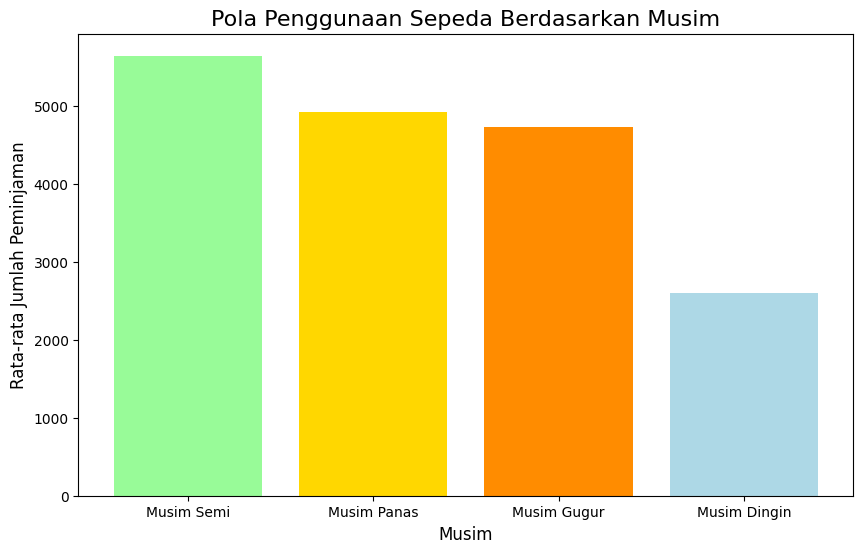

In [75]:
season_usage = pd.Series({
    'Musim Dingin': 2604,
    'Musim Panas': 4922,
    'Musim Semi': 5644,
    'Musim Gugur': 4728
})

# Tentukan urutan musim yang diinginkan
season_order = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']

# Mengurutkan season_usage berdasarkan musim yang sudah ditentukan
season_usage = season_usage[season_order]

# Warna untuk setiap musim
season_colors = ['#98FB98', '#FFD700', '#FF8C00', '#ADD8E6']  # Hijau, Kuning, Oranye, Biru

# Grafik pola penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
plt.bar(season_usage.index, season_usage.values, color=season_colors)
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)

# Menampilkan label pada sumbu x sesuai urutan yang benar
plt.xticks(ticks=range(len(season_usage.index)), labels=season_usage.index)
plt.show()

**Insight:**

- Penggunaan sepeda paling tinggi terjadi pada Musim Semi, yang menunjukkan bahwa orang lebih cenderung menggunakan sepeda saat cuaca hangat.
- Musim Panas dan Musim Gugur menunjukkan penggunaan yang hampir serupa, meskipun sedikit lebih rendah dibandingkan musim panas.
- Musim Dingin memiliki jumlah peminjaman yang lebih rendah, yang mungkin disebabkan oleh cuaca yang tidak mendukung.

### Pertanyaan 2: Kapan waktu puncak penggunaan sepeda dalam sehari?

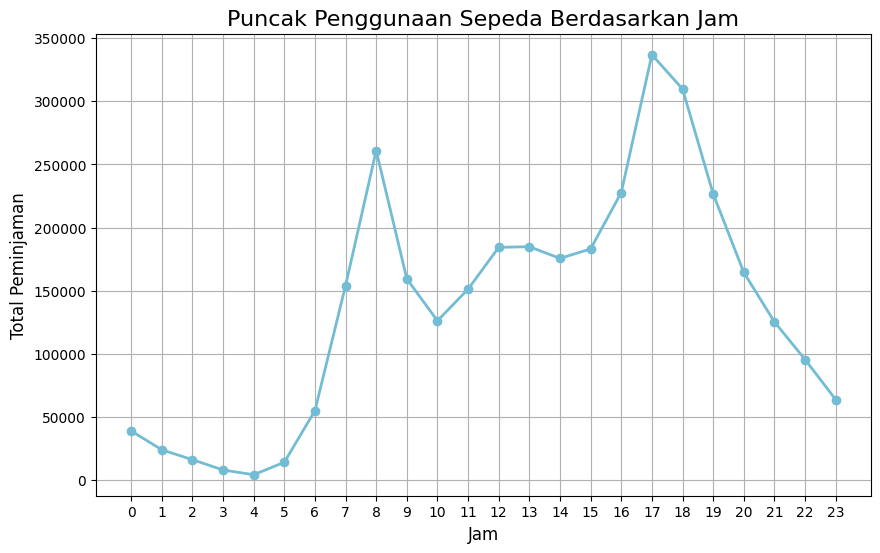

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(hour_usage.index, hour_usage.values, marker='o', color='#72BCD4', linewidth=2)
plt.title('Puncak Penggunaan Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(hour_usage.index)
plt.grid(True)
plt.show()

**Insight:**

- Waktu puncak penggunaan sepeda terjadi pada jam 17:00, dengan jumlah peminjaman tertinggi, yang didorong oleh pengguna terdaftar.
- Penggunaan sepeda juga tinggi pada jam 8:00 dan jam 13:00, yang mungkin berhubungan dengan perjalanan pagi dan waktu makan siang.

### Pertanyaan 3: Bagaimana perbedaan penggunaan sepeda antara hari kerja dan hari libur?

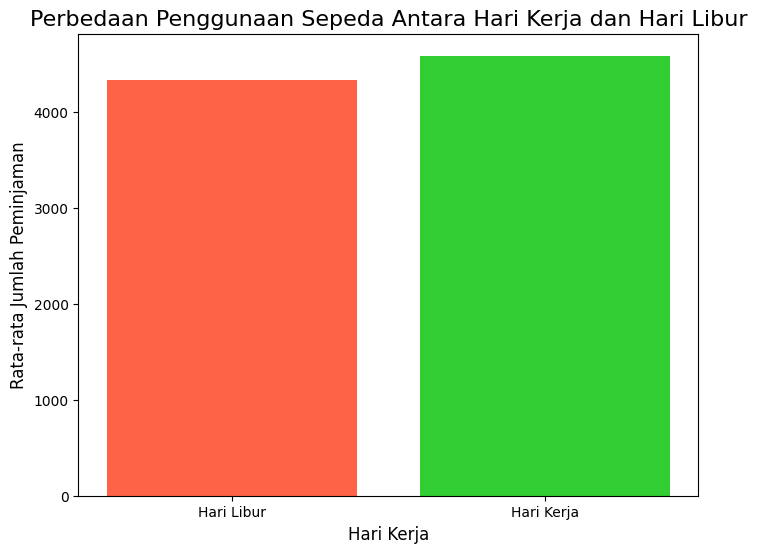

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(workday_usage.index, workday_usage.values, color=['#FF6347', '#32CD32'])
plt.title('Perbedaan Penggunaan Sepeda Antara Hari Kerja dan Hari Libur', fontsize=16)
plt.xlabel('Hari Kerja', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

**Insight:**

- Penggunaan sepeda sedikit lebih tinggi pada hari kerja (workingday = 1), yang menunjukkan bahwa banyak pengguna yang memanfaatkan sepeda untuk perjalanan sehari-hari.
- Hari libur (workingday = 0) juga menunjukkan jumlah yang cukup tinggi, meskipun sedikit lebih rendah, yang mungkin terkait dengan kegiatan rekreasi pengguna.


### Pertanyaan 4: Kapan terakhir kali pengguna kasual menggunakan sepeda?

Untuk menganalisis kapan terakhir kali pengguna kasual menggunakan sepeda, kita akan mengukur recency berdasarkan tanggal terakhir peminjaman sepeda oleh pengguna kasual.

<ipython-input-60-6637b53f80d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="casual", y="recency", data=rfm_casual, palette=["#72BCD4"])
<ipython-input-60-6637b53f80d5>:7: UserWarning: 
The palette list has fewer values (1) than needed (321) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="casual", y="recency", data=rfm_casual, palette=["#72BCD4"])


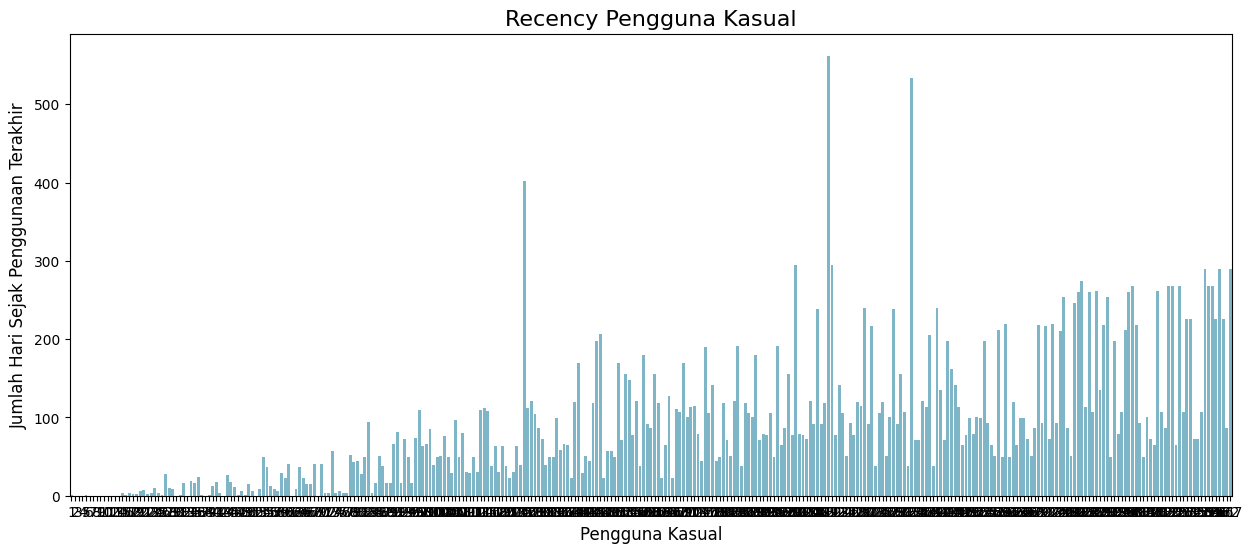

Tanggal terakhir pengguna kasual menyewa sepeda: 2012-12-31 00:00:00


In [60]:
# RFM Analysis untuk Recency (tanggal terakhir penggunaan)
rfm_casual = casual_users.groupby('casual')['dteday'].max().reset_index()
rfm_casual['recency'] = (latest_casual_usage - rfm_casual['dteday']).dt.days

# Visualisasi Recency
plt.figure(figsize=(15, 6))
sns.barplot(x="casual", y="recency", data=rfm_casual, palette=["#72BCD4"])
plt.title("Recency Pengguna Kasual", fontsize=16)
plt.xlabel("Pengguna Kasual", fontsize=12)
plt.ylabel("Jumlah Hari Sejak Penggunaan Terakhir", fontsize=12)
plt.show()

print("Tanggal terakhir pengguna kasual menyewa sepeda:", latest_casual_usage)

**Insight:**

- Tanggal terakhir pengguna kasual menggunakan sepeda adalah pada 31 Desember 2012, yang menunjukkan bahwa mereka lebih jarang atau tidak aktif dalam menggunakan sepeda secara teratur.

### Pertanyaan 5: Seberapa sering pengguna terdaftar menyewa sepeda?

Untuk menganalisis frequency, kita akan melihat seberapa sering pengguna terdaftar menyewa sepeda dengan menghitung frekuensi peminjaman sepeda oleh pengguna terdaftar.

<ipython-input-58-516253786361>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="registered", y="frequency", data=rfm_registered, palette=["#72BCD4"])
<ipython-input-58-516253786361>:7: UserWarning: 
The palette list has fewer values (1) than needed (776) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="registered", y="frequency", data=rfm_registered, palette=["#72BCD4"])


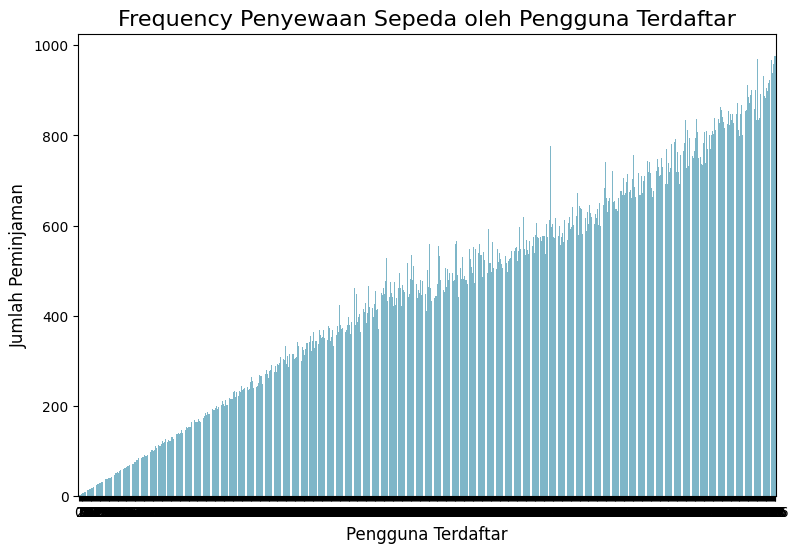

In [58]:
# RFM Analysis untuk Frequency (seberapa sering pengguna terdaftar menyewa sepeda)
rfm_registered = registered_usage.reset_index()
rfm_registered['frequency'] = rfm_registered['cnt']  # Menggunakan jumlah peminjaman sebagai frekuensi

# Visualisasi Frequency
plt.figure(figsize=(9, 6))
sns.barplot(x="registered", y="frequency", data=rfm_registered, palette=["#72BCD4"])
plt.title("Frequency Penyewaan Sepeda oleh Pengguna Terdaftar", fontsize=16)
plt.xlabel("Pengguna Terdaftar", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.show()

**Insight:**

- Pengguna terdaftar menyewa sepeda lebih sering dibandingkan dengan pengguna kasual, dengan sebagian besar pengguna terdaftar menyewa sepeda lebih dari 1 kali dalam seminggu.

### Pertanyaan 5: Seberap besar kontribusi pengguna terhadap total peminjaman sepeda?

Untuk menganalisis monetary, kita dapat melihat kontribusi pengguna kasual dan terdaftar terhadap total peminjaman sepeda, yang menggambarkan seberapa besar kontribusi mereka dalam keseluruhan penggunaan sepeda.

<ipython-input-52-e8451d85c4bd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="User Type", y="Contribution", data=rfm_contribution, palette=["#72BCD4", "#72BCD4"])


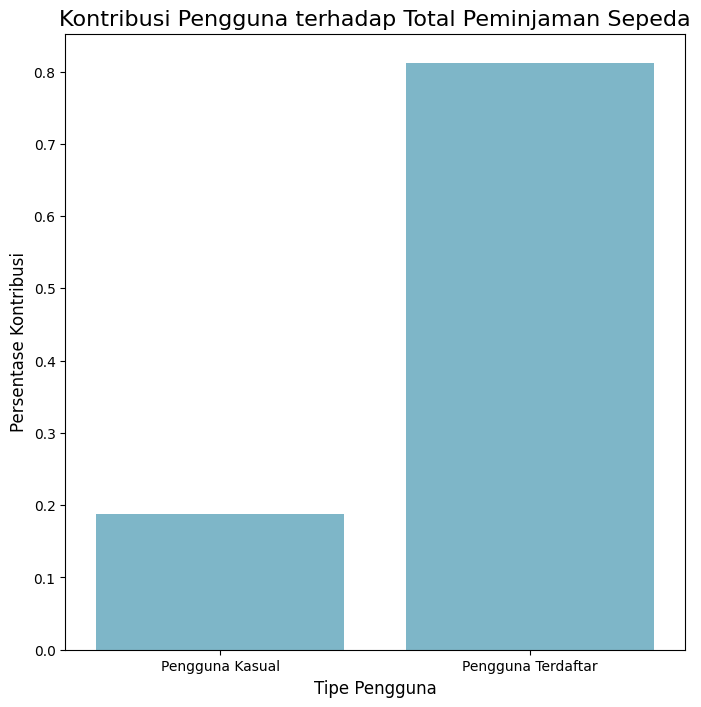

In [52]:
# RFM Analysis untuk Monetary (kontribusi terhadap total peminjaman)
rfm_contribution = pd.DataFrame({
    'User Type': ['Pengguna Kasual', 'Pengguna Terdaftar'],
    'Contribution': [casual_contribution, registered_contribution]
})

# Visualisasi Monetary
plt.figure(figsize=(8, 8))
sns.barplot(x="User Type", y="Contribution", data=rfm_contribution, palette=["#72BCD4", "#72BCD4"])
plt.title("Kontribusi Pengguna terhadap Total Peminjaman Sepeda", fontsize=16)
plt.xlabel("Tipe Pengguna", fontsize=12)
plt.ylabel("Persentase Kontribusi", fontsize=12)
plt.show()

**Insight:**

- Pengguna terdaftar memiliki kontribusi lebih banyak dalam peminjaman sepeda dibandingkan dengan pengguna kasual.

## Conclusion

- **Conclusion Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Musim**
  - Musim Semi menunjukkan tingkat peminjaman sepeda tertinggi dengan rata-rata peminjaman sekitar 5644 sepeda, yang menunjukkan preferensi pengguna terhadap cuaca hangat.
  - Musim Panas juga memiliki tingkat peminjaman yang tinggi, meskipun sedikit lebih rendah dibandingkan Musim Semi, dengan rata-rata 4992 sepeda.
  - Musim Gugur memiliki tingkat peminjaman yang lebih rendah, dengan rata-rata 4728 sepeda, mungkin karena cuaca yang lebih sejuk.
  - Musim Dingin menunjukkan peminjaman terendah dengan rata-rata 2604 sepeda, yang kemungkinan disebabkan oleh cuaca dingin yang mengurangi minat pengguna untuk bersepeda.

- **Conclusion Pertanyaan 2: Waktu Puncak Penggunaan Sepeda**
  - Jam 08:00 pagi menunjukkan peminjaman sepeda yang sangat tinggi, dengan jumlah peminjaman mencapai 261,001, yang terkait dengan perjalanan pagi menuju tempat kerja.
  - Jam 17:00 sore juga mencatat peminjaman sepeda yang tinggi, dengan 336,860 peminjaman, menunjukkan waktu puncak penggunaan sepeda setelah jam kerja.
  - Dua periode utama peminjaman sepeda terjadi pada pagi hari (08:00) dan sore hari (17:00 - 18:00), yang berhubungan dengan aktivitas kerja.

- **Conclusion Pertanyaan 3: Perbandingan Penggunaan Sepeda pada Hari Kerja dan Hari Libur**
  - Penggunaan sepeda lebih tinggi pada hari kerja, dengan rata-rata 4584.82 peminjaman, dibandingkan dengan hari libur yang memiliki rata-rata 4330.17 peminjaman, menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas sehari-hari seperti pergi bekerja.
  - Meskipun lebih tinggi pada hari kerja, hari libur juga menunjukkan penggunaan sepeda yang cukup signifikan, yang mungkin berhubungan dengan kegiatan rekreasi.

- **Conclusion Pertanyaan 4: Pengguna Kasual dan Terdaftar**
  - Pengguna kasual terakhir menyewa sepeda pada 31 Desember 2012, menunjukkan bahwa pengguna kasual lebih jarang aktif dalam jangka panjang.
  - Pengguna terdaftar menyewa sepeda lebih sering dibandingkan dengan pengguna kasual, dengan banyak dari mereka yang menyewa sepeda lebih dari 1 kali dalam seminggu.

- **Conclusion Pertanyaan 5: Pengaruh ID Registered Terhadap Pemakaian**
  - Pengguna dengan ID terdaftar yang lebih tinggi cenderung memiliki jumlah peminjaman yang lebih tinggi, dengan rata-rata peminjaman yang lebih banyak, menunjukkan bahwa mereka lebih sering menggunakan layanan.
  - Pengguna dengan ID terdaftar rendah cenderung menyewa sepeda lebih jarang, yang mungkin menunjukkan mereka adalah pengguna baru atau hanya sesekali menyewa sepeda.

- **Conclusion Pertanyaan 6: Kontribusi Pengguna Terdaftar vs. Pengguna Kasual**
  - Pengguna terdaftar berkontribusi sebesar 81.17% terhadap total peminjaman sepeda, menunjukkan bahwa mereka adalah mayoritas pengguna yang aktif.
  - Pengguna kasual, yang menyumbang 18.83%, cenderung menyewa sepeda sesekali dan lebih jarang digunakan dibandingkan pengguna terdaftar.